In [1]:
import pandas as pd

data_frame = pd.read_csv("3618222.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35036 entries, 0 to 35035
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          35036 non-null  object 
 1   NAME             35036 non-null  object 
 2   DATE             35036 non-null  object 
 3   HLY-CLDH-NORMAL  35036 non-null  float64
 4   HLY-CLOD-PCTBKN  35036 non-null  int64  
 5   HLY-CLOD-PCTCLR  35036 non-null  int64  
 6   HLY-CLOD-PCTFEW  35036 non-null  int64  
 7   HLY-CLOD-PCTOVC  35036 non-null  int64  
 8   HLY-CLOD-PCTSCT  35036 non-null  int64  
 9   HLY-DEWP-10PCTL  35036 non-null  float64
 10  HLY-DEWP-90PCTL  35036 non-null  float64
 11  HLY-DEWP-NORMAL  35036 non-null  float64
 12  HLY-HIDX-NORMAL  35036 non-null  float64
 13  HLY-HTDH-NORMAL  35036 non-null  float64
 14  HLY-PRES-10PCTL  35036 non-null  float64
 15  HLY-PRES-90PCTL  35036 non-null  float64
 16  HLY-PRES-NORMAL  35036 non-null  float64
 17  HLY-TEMP-10P

array([[<Axes: xlabel='HLY-CLOD-PCTCLR', ylabel='HLY-CLOD-PCTCLR'>,
        <Axes: xlabel='HLY-DEWP-NORMAL', ylabel='HLY-CLOD-PCTCLR'>],
       [<Axes: xlabel='HLY-CLOD-PCTCLR', ylabel='HLY-DEWP-NORMAL'>,
        <Axes: xlabel='HLY-DEWP-NORMAL', ylabel='HLY-DEWP-NORMAL'>]],
      dtype=object)

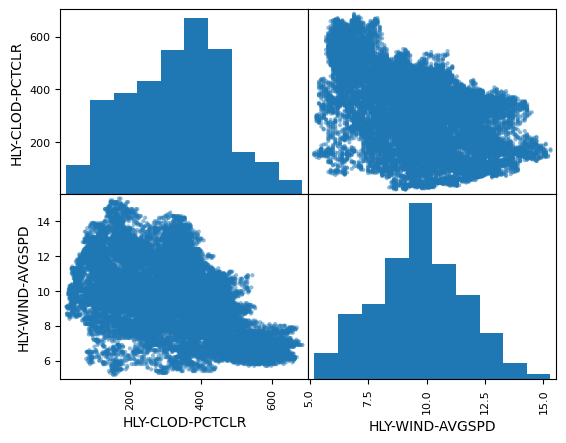

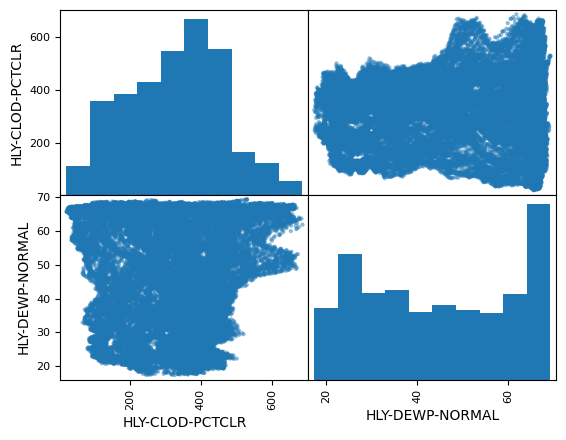

In [11]:
data_frame.info()

from pandas.plotting import scatter_matrix

compare = ["HLY-CLOD-PCTCLR", "HLY-WIND-AVGSPD"]

scatter_matrix(data_frame[["HLY-CLOD-PCTCLR", "HLY-WIND-AVGSPD"]])
scatter_matrix(data_frame[["HLY-CLOD-PCTCLR", "HLY-DEWP-NORMAL"]])

While there is a weak correlation between Percentage cloud clear (HLY-CLOD-PCTCLR) with Average wind speed (HLY-WIND-AVGSPD) and Dewpoint Average (HLY-DEWP-NORMAL); They do however still show some structure. I suspect this is because the effects of the features individually are drowned out by the multitude of other features that affect cloud cover.

My goal is to predict Clouds broken percent (HLY-CLOD-PCTBKN) and Clouds overcast percent (HLY-CLOD-PCTOVC) as this will allow me to understand the structure of the weather at the time which is part of the aim of my project.

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_frame, test_size = 0.25)

print(len(train_set), len(test_set))

print(train_set.head())
print(test_set.head())

26277 8759
           STATION                                           NAME  \
30177  USW00013994  ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US   
7885   USW00003945               COLUMBIA REGIONAL AIRPORT, MO US   
13020  USW00003947       KANSAS CITY INTERNATIONAL AIRPORT, MO US   
26084  USW00013995            SPRINGFIELD REGIONAL AIRPORT, MO US   
12964  USW00003947       KANSAS CITY INTERNATIONAL AIRPORT, MO US   

                 DATE  HLY-CLDH-NORMAL  HLY-CLOD-PCTBKN  HLY-CLOD-PCTCLR  \
30177  06-12T13:00:00             17.0              343               58   
7885   11-25T14:00:00              0.3              103              362   
13020  06-27T14:00:00             19.0              268               92   
26084  12-23T23:00:00           -777.7               59              416   
12964  06-25T06:00:00              4.4              247              188   

       HLY-CLOD-PCTFEW  HLY-CLOD-PCTOVC  HLY-CLOD-PCTSCT  HLY-DEWP-10PCTL  \
30177              100              278 

In [14]:
test_set.to_csv("test_set.csv")
train_set.to_csv("train_set.csv")